In [370]:
%matplotlib inline

import numpy as np
from scipy import special
import matplotlib.pyplot as plt
from math import *

In [418]:
#Radial Parameters  
                                                #TIME FOR CHANGE#
r_div=80
radius=5.0
delta_r=radius/(r_div-0.5)

#Spherical Parameters
lat_div=16
bWidth=int(lat_div/2)

#data structure defined
r_values=np.zeros((r_div))
k_values=np.zeros((r_div))
theta_values=np.zeros((lat_div))
phi_values=np.zeros((lat_div))
egf_values=np.zeros((lat_div,lat_div,r_div),dtype=complex)

#Filling the data structure
for i in range(r_div):
    r_values[i]=(i+1.0/2.0)*delta_r
    k_values[i]=(2*pi)*(i+1.0/2.0)/(r_div-1.0/2.0)/(2*delta_r)
for i in range(lat_div):
    theta_values[i]=pi*(2*i+1)/(4*(lat_div/2))
    phi_values[i]=2*pi*i/(2*(lat_div/2))
    
#Printing the stuffs
print ("delta_r = ",delta_r)
print ("r_vlaues = ",r_values)
print ("k_values = ",k_values)
#print ("theta_values = ",theta_values)
#print ("phi_values = ",phi_values)

delta_r =  0.06289308176100629
r_vlaues =  [ 0.03144654  0.09433962  0.1572327   0.22012579  0.28301887  0.34591195
  0.40880503  0.47169811  0.53459119  0.59748428  0.66037736  0.72327044
  0.78616352  0.8490566   0.91194969  0.97484277  1.03773585  1.10062893
  1.16352201  1.22641509  1.28930818  1.35220126  1.41509434  1.47798742
  1.5408805   1.60377358  1.66666667  1.72955975  1.79245283  1.85534591
  1.91823899  1.98113208  2.04402516  2.10691824  2.16981132  2.2327044
  2.29559748  2.35849057  2.42138365  2.48427673  2.54716981  2.61006289
  2.67295597  2.73584906  2.79874214  2.86163522  2.9245283   2.98742138
  3.05031447  3.11320755  3.17610063  3.23899371  3.30188679  3.36477987
  3.42767296  3.49056604  3.55345912  3.6163522   3.67924528  3.74213836
  3.80503145  3.86792453  3.93081761  3.99371069  4.05660377  4.11949686
  4.18238994  4.24528302  4.3081761   4.37106918  4.43396226  4.49685535
  4.55974843  4.62264151  4.68553459  4.74842767  4.81132075  4.87421384
  4.93710

In [419]:
coeff_handle=open("spht_file.txt","r")
coeff_matrix=np.zeros((bWidth,lat_div,r_div),dtype=complex)

for line in coeff_handle:
    part1=line.split(":")
    index=part1[0].strip().split(" ")
    if(index[0]=="Writing"):
        break
    l=int(index[0])
    try:
        m=int(index[1])
    except:
        m=int(index[2])
    if(m<0):
        m=bWidth+(bWidth+m)
    coeffs=part1[1].split(";")
    for i,coeff in enumerate(coeffs): 
        coeff=coeff.split(",")
        coeff_matrix[l,m,i]=float(coeff[0])+float(coeff[1])*1j
        #print (coeff_matrix[l,m,i])
#print (coeff_matrix)

In [420]:
def eigen_function_val(r,theta,phi):
    val=0*(1j)
    for i in range(lat_div):#This is m variation
        if(i<bWidth):
            start_idx=i
            m=i
        elif(i>bWidth):
            start_idx=(bWidth-(i-bWidth))
            m=-start_idx
        else:
            continue
        iterator_l=np.linspace(start_idx,bWidth-1,(bWidth-1)-start_idx+1)
        for j in iterator_l.astype(int):#This is l variation
            l=j
            #print (l)
            for k in range(r_div):#This is k variation
                val=val+(coeff_matrix[l,i,k])*special.spherical_jn(l,k_values[k]*r)\
                                           *special.sph_harm(m,l,phi,theta)\
                                           /k_values[k]
    return val

In [421]:
for i in range(r_div):
    for j in range(lat_div):
        for k in range(lat_div):
            egf_values[k,j,i]=eigen_function_val(r_values[i],theta_values[k],phi_values[j])
        

In [422]:
print (egf_values[0,0,:])
print (egf_values[0,7,:])

[ 160.13878014+0.j  160.07722353+0.j  159.95647510+0.j  159.79359114+0.j
  159.58915025+0.j  159.34811428+0.j  159.07177193+0.j  158.76311273+0.j
  158.42318253+0.j  158.05415808+0.j  157.65689198+0.j  157.23310652+0.j
  156.78351779+0.j  156.30955576+0.j  155.81183790+0.j  155.29159004+0.j
  154.74935600+0.j  154.18621104+0.j  153.60264235+0.j  152.99960972+0.j
  152.37755577+0.j  151.73734911+0.j  151.07939660+0.j  150.40449320+0.j
  149.71301665+0.j  149.00570136+0.j  148.28290109+0.j  147.54529975+0.j
  146.79323114+0.j  146.02733659+0.j  145.24793320+0.j  144.45562605+0.j
  143.65071820+0.j  142.83378362+0.j  142.00511357+0.j  141.16525517+0.j
  140.31448975+0.j  139.45334118+0.j  138.58208242+0.j  137.70121717+0.j
  136.81101138+0.j  135.91195118+0.j  135.00429676+0.j  134.08851893+0.j
  133.16487316+0.j  132.23381698+0.j  131.29560206+0.j  130.35067440+0.j
  129.39928275+0.j  128.44186314+0.j  127.47866220+0.j  126.51010740+0.j
  125.53644393+0.j  124.55809200+0.j  123.57529605+

In [423]:
print (egf_values[1,0,:])
print (egf_values[1,7,:])

[ 160.13968260+0.j  160.08418065+0.j  159.97389412+0.j  159.82501964+0.j
  159.63735127+0.j  159.41601665+0.j  159.16152119+0.j  158.87706099+0.j
  158.56308174+0.j  158.22193379+0.j  157.85399035+0.j  157.46111756+0.j
  157.04363328+0.j  156.60308831+0.j  156.13975931+0.j  155.65497509+0.j
  155.14898111+0.j  154.62294138+0.j  154.07707728+0.j  153.51242568+0.j
  152.92918897+0.j  152.32830307+0.j  151.70995517+0.j  151.07499916+0.j
  150.42360988+0.j  149.75657334+0.j  149.07405430+0.j  148.37678170+0.j
  147.66491197+0.j  146.93912555+0.j  146.19957192+0.j  145.44688982+0.j
  144.68122297+0.j  143.90317393+0.j  143.11288163+0.j  142.31091699+0.j
  141.49741496+0.j  140.67291865+0.j  139.83755973+0.j  138.99185665+0.j
  138.13593844+0.j  137.27030163+0.j  136.39507310+0.j  135.51072982+0.j
  134.61739700+0.j  133.71553406+0.j  132.80526495+0.j  131.88703331+0.j
  130.96096224+0.j  130.02748111+0.j  129.08671252+0.j  128.13907294+0.j
  127.18468482+0.j  126.22395289+0.j  125.25699980+

In [424]:
#print (egf_values)

[ 5.          4.93710692  4.87421384  4.81132075  4.74842767  4.68553459
  4.62264151  4.55974843  4.49685535  4.43396226  4.37106918  4.3081761
  4.24528302  4.18238994  4.11949686  4.05660377  3.99371069  3.93081761
  3.86792453  3.80503145  3.74213836  3.67924528  3.6163522   3.55345912
  3.49056604  3.42767296  3.36477987  3.30188679  3.23899371  3.17610063
  3.11320755  3.05031447  2.98742138  2.9245283   2.86163522  2.79874214
  2.73584906  2.67295597  2.61006289  2.54716981  2.48427673  2.42138365
  2.35849057  2.29559748  2.2327044   2.16981132  2.10691824  2.04402516
  1.98113208  1.91823899  1.85534591  1.79245283  1.72955975  1.66666667
  1.60377358  1.5408805   1.47798742  1.41509434  1.35220126  1.28930818
  1.22641509  1.16352201  1.10062893  1.03773585  0.97484277  0.91194969
  0.8490566   0.78616352  0.72327044  0.66037736  0.59748428  0.53459119
  0.47169811  0.40880503  0.34591195  0.28301887  0.22012579  0.1572327
  0.09433962  0.03144654]


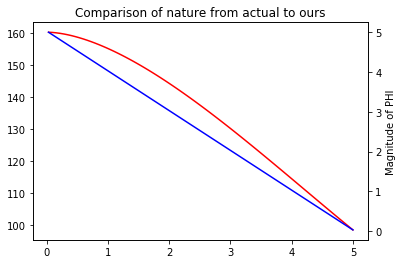

In [425]:
#Creating the reference Values
#ref_values=((3.5)**2/2.0)-((r_values**2)/6.0)
ref_values=r_values[::-1]
#ref_values=np.ones((r_div))
print (ref_values)
xt=np.linspace(0,4,9)
yt=np.linspace(0,4,9)
yref_t=np.linspace(0,7,15)
#Plotting the radial variation along theta and phi direction.
fig,ax1=plt.subplots()
ax2=ax1.twinx()

curve1,=ax1.plot(r_values,egf_values[0,0,:].real,color="r",label="Theta0")
curve2,=ax2.plot(r_values,ref_values,color="b",label="Actual")

plt.title("Comparison of nature from actual to ours")
plt.xlabel("radial distance")
plt.ylabel("Magnitude of PHI")
plt.show()

[ 12.49983519  12.49851667  12.49587965  12.49192411  12.48665005
  12.48005749  12.47214641  12.46291681  12.45236871  12.44050209
  12.42731696  12.41281331  12.39699115  12.37985048  12.3613913
  12.3416136   12.32051738  12.29810266  12.27436942  12.24931767
  12.2229474   12.19525863  12.16625133  12.13592553  12.10428121
  12.07131838  12.03703704  12.00143718  11.96451881  11.92628192
  11.88672653  11.84585262  11.80366019  11.76014926  11.71531981
  11.66917184  11.62170537  11.57292037  11.52281687  11.47139486
  11.41865433  11.36459528  11.30921773  11.25252166  11.19450707
  11.13517398  11.07452237  11.01255225  10.94926361  10.88465646
  10.8187308   10.75148662  10.68292393  10.61304273  10.54184302
  10.46932479  10.39548805  10.32033279  10.24385902  10.16606674
  10.08695595  10.00652664   9.92477882   9.84171249   9.75732764
   9.67162428   9.5846024    9.49626201   9.40660311   9.3156257
   9.22332977   9.12971533   9.03478238   8.93853091   8.84096093
   8.7420724

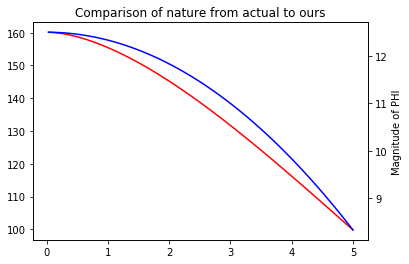

In [452]:
#Creating the reference Values
ref_values=((radius**2)/2.0)-((r_values**2)/6.0)                     #Rho could be multiplid(ltr)
#ref_values=r_values[::-1]
print (ref_values)
xt=np.linspace(0,4,9)
yt=np.linspace(0,4,9)
yref_t=np.linspace(0,7,15)
#Plotting the radial variation along theta and phi direction.
fig,ax1=plt.subplots()
ax2=ax1.twinx()

curve1,=ax1.plot(r_values,egf_values[1,0,:].real,color="r",label="Theta4")
curve2,=ax2.plot(r_values,ref_values,color="b",label="Actual")

plt.title("Comparison of nature from actual to ours")
plt.xlabel("radial distance")
plt.ylabel("Magnitude of PHI")
plt.show()

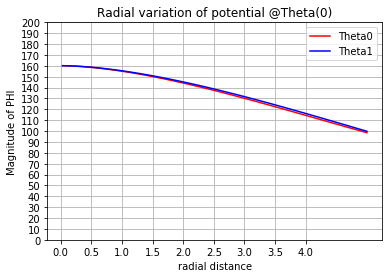

In [440]:
xt=np.linspace(0,4,9)
yt=np.linspace(0,200,21)
#Plotting the radial variation along theta and phi direction.
plt.plot(r_values,egf_values[0,0,:].real,"r",r_values,egf_values[1,0,:].real,"b")
plt.xlabel("radial distance")
plt.ylabel("Magnitude of PHI")
plt.title("Radial variation of potential @Theta(0)")
plt.xticks(xt)
plt.yticks(yt)
plt.legend(["Theta0","Theta1"])
plt.grid()
plt.show()

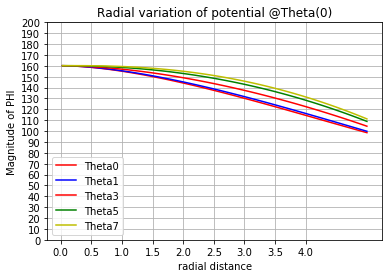

In [428]:
xt=np.linspace(0,4,9)
yt=np.linspace(0,200,21)
#Plotting the radial variation along theta and phi direction.
plt.plot(r_values,egf_values[0,0,:].real,color="r",label="Theta0")
plt.plot(r_values,egf_values[1,0,:].real,color="b",label="Theta1")
plt.plot(r_values,egf_values[3,0,:].real,color="r",label="Theta3")
plt.plot(r_values,egf_values[5,0,:].real,color="g",label="Theta5")
plt.plot(r_values,egf_values[7,0,:].real,color="y",label="Theta7")
plt.xlabel("radial distance")
plt.ylabel("Magnitude of PHI")
plt.title("Radial variation of potential @Theta(0)")
plt.xticks(xt)
plt.yticks(yt)
plt.legend()
plt.grid()
plt.show()
#Finally after theta7 the valus reverts symmetrically.

In [438]:
a80=egf_values[4,0,:]/ref_values[:]*((2/pi)**(0.5))
print ("division=",r_div)
print ("delta_r=",delta_r)
print (a80*delta_r)

division= 80
delta_r= 0.06289308176100629
[ 0.64291625+0.j  0.64292367+0.j  0.64288409+0.j  0.64285153+0.j
  0.64280039+0.j  0.64275233+0.j  0.64269217+0.j  0.64263420+0.j
  0.64256762+0.j  0.64250309+0.j  0.64243220+0.j  0.64236348+0.j
  0.64229002+0.j  0.64221893+0.j  0.64214434+0.j  0.64207234+0.j
  0.64199782+0.j  0.64192613+0.j  0.64185273+0.j  0.64178236+0.j
  0.64171096+0.j  0.64164281+0.j  0.64157420+0.j  0.64150902+0.j
  0.64144389+0.j  0.64138238+0.j  0.64132134+0.j  0.64126409+0.j
  0.64120769+0.j  0.64115524+0.j  0.64110399+0.j  0.64105682+0.j
  0.64101116+0.j  0.64096974+0.j  0.64093009+0.j  0.64089481+0.j
  0.64086156+0.j  0.64083279+0.j  0.64080630+0.j  0.64078441+0.j
  0.64076501+0.j  0.64075033+0.j  0.64073834+0.j  0.64073119+0.j
  0.64072692+0.j  0.64072759+0.j  0.64073133+0.j  0.64074012+0.j
  0.64075216+0.j  0.64076936+0.j  0.64078998+0.j  0.64081588+0.j
  0.64084537+0.j  0.64088025+0.j  0.64091890+0.j  0.64096305+0.j
  0.64101114+0.j  0.64106487+0.j  0.64112271+0.j

In [331]:
#egf_values[0,0,:]/ref_values[:]*((2/pi)**(0.5))  #radius=5.0(const),division=5,delta_r=1.111

array([ 0.70616064+0.j,  0.68503164+0.j,  0.67752057+0.j,  0.67907329+0.j,
        0.70352591+0.j])

In [348]:
delta_r5=1.11111
a5=np.array((0.70616064+0.j,  0.68503164+0.j,  0.67752057+0.j,  0.67907329+0.j,
        0.70352591+0.j))
print (a5*delta_r5)

[ 0.78462215+0.j  0.76114551+0.j  0.75279988+0.j  0.75452512+0.j
  0.78169467+0.j]


In [349]:
#a10=egf_values[0,0,:]/ref_values[:]*((2/pi)**(0.5)) #radius=5.0(const),division=10,delta_r=0.5
print (a1*delta_r)

[ 0.70036758+0.j  0.69587016+0.j  0.68757949+0.j  0.67965990+0.j
  0.67210904+0.j  0.66647561+0.j  0.66306674+0.j  0.66333436+0.j
  0.66841799+0.j  0.67955852+0.j]


In [365]:
#a15=egf_values[0,0,:]/ref_values[:]*((2/pi)**(0.5))
print ("division=",r_div)
print ("delta_r=",delta_r)
print (a15*delta_r)

division= 15
delta_r= 0.3448275862068966
[ 0.67937635+0.j  0.67525119+0.j  0.67078326+0.j  0.66533859+0.j
  0.65981934+0.j  0.65420904+0.j  0.64902240+0.j  0.64426921+0.j
  0.64035712+0.j  0.63735288+0.j  0.63566298+0.j  0.63546958+0.j
  0.63726125+0.j  0.64149983+0.j  0.64844555+0.j]


In [386]:
#a25=egf_values[0,0,:]/ref_values[:]*((2/pi)**(0.5))
print ("division=",r_div)
print ("delta_r=",delta_r)
print (a25*delta_r)

division= 25
delta_r= 0.20408163265306123
[ 0.66104934+0.j  0.65933094+0.j  0.65722600+0.j  0.65453072+0.j
  0.65155760+0.j  0.64831426+0.j  0.64497235+0.j  0.64153502+0.j
  0.63812246+0.j  0.63473667+0.j  0.63147279+0.j  0.62833467+0.j
  0.62540492+0.j  0.62269187+0.j  0.62027339+0.j  0.61816529+0.j
  0.61644686+0.j  0.61514545+0.j  0.61434779+0.j  0.61409916+0.j
  0.61450049+0.j  0.61562676+0.j  0.61759796+0.j  0.62055568+0.j
  0.62449064+0.j]


In [400]:
#a40=egf_values[0,0,:]/ref_values[:]*((2/pi)**(0.5))
print ("division=",r_div)
print ("delta_r=",delta_r)
print (a40*delta_r)

division= 40
delta_r= 0.12658227848101267
[ 0.65089125+0.j  0.65034790+0.j  0.64930798+0.j  0.64802008+0.j
  0.64649193+0.j  0.64480742+0.j  0.64297312+0.j  0.64104214+0.j
  0.63901861+0.j  0.63694130+0.j  0.63481291+0.j  0.63266402+0.j
  0.63049657+0.j  0.62833598+0.j  0.62618387+0.j  0.62406230+0.j
  0.62197289+0.j  0.61993548+0.j  0.61795198+0.j  0.61604085+0.j
  0.61420456+0.j  0.61246081+0.j  0.61081290+0.j  0.60927836+0.j
  0.60786163+0.j  0.60658057+0.j  0.60544114+0.j  0.60446208+0.j
  0.60365134+0.j  0.60302914+0.j  0.60260603+0.j  0.60240440+0.j
  0.60243830+0.j  0.60273300+0.j  0.60330749+0.j  0.60419052+0.j
  0.60540871+0.j  0.60699313+0.j  0.60898888+0.j  0.61136739+0.j]


In [415]:
#a80=egf_values[0,0,:]/ref_values[:]*((2/pi)**(0.5)) #lat_division=8 in all above
print ("division=",r_div)
print ("delta_r=",delta_r)
print (a80*delta_r)

division= 80
delta_r= 0.06289308176100629
[ 0.64288919+0.j  0.64272149+0.j  0.64239776+0.j  0.64197970+0.j
  0.64146969+0.j  0.64088880+0.j  0.64023917+0.j  0.63953430+0.j
  0.63877568+0.j  0.63797324+0.j  0.63712809+0.j  0.63624803+0.j
  0.63533388+0.j  0.63439209+0.j  0.63342327+0.j  0.63243289+0.j
  0.63142144+0.j  0.63039364+0.j  0.62934990+0.j  0.62829437+0.j
  0.62722738+0.j  0.62615268+0.j  0.62507052+0.j  0.62398429+0.j
  0.62289423+0.j  0.62180345+0.j  0.62071215+0.j  0.61962321+0.j
  0.61853683+0.j  0.61745569+0.j  0.61638000+0.j  0.61531230+0.j
  0.61425277+0.j  0.61320385+0.j  0.61216573+0.j  0.61114076+0.j
  0.61012915+0.j  0.60913315+0.j  0.60815302+0.j  0.60719097+0.j
  0.60624727+0.j  0.60532410+0.j  0.60442178+0.j  0.60354245+0.j
  0.60268652+0.j  0.60185610+0.j  0.60105165+0.j  0.60027532+0.j
  0.59952763+0.j  0.59881074+0.j  0.59812529+0.j  0.59747346+0.j
  0.59685598+0.j  0.59627510+0.j  0.59573166+0.j  0.59522799+0.j
  0.59476504+0.j  0.59434525+0.j  0.59396973+0.j

In [430]:
#a80=egf_values[0,0,:]/ref_values[:]*((2/pi)**(0.5)) #lat_division=16 this one
print ("division=",r_div)
print ("delta_r=",delta_r)
print (a80*delta_r)

division= 80
delta_r= 0.06289308176100629
[ 0.64288777+0.j  0.64270844+0.j  0.64235917+0.j  0.64190825+0.j
  0.64135777+0.j  0.64072738+0.j  0.64002193+0.j  0.63925310+0.j
  0.63842473+0.j  0.63754516+0.j  0.63661743+0.j  0.63564803+0.j
  0.63463943+0.j  0.63359693+0.j  0.63252258+0.j  0.63142087+0.j
  0.63029352+0.j  0.62914443+0.j  0.62797511+0.j  0.62678899+0.j
  0.62558741+0.j  0.62437343+0.j  0.62314827+0.j  0.62191473+0.j
  0.62067391+0.j  0.61942841+0.j  0.61817924+0.j  0.61692882+0.j
  0.61567813+0.j  0.61442946+0.j  0.61318374+0.j  0.61194314+0.j
  0.61070861+0.j  0.60948222+0.j  0.60826492+0.j  0.60705874+0.j
  0.60586463+0.j  0.60468458+0.j  0.60351957+0.j  0.60237160+0.j
  0.60124166+0.j  0.60013176+0.j  0.59904295+0.j  0.59797727+0.j
  0.59693582+0.j  0.59592069+0.j  0.59493307+0.j  0.59397510+0.j
  0.59304807+0.j  0.59215419+0.j  0.59129488+0.j  0.59047245+0.j
  0.58968845+0.j  0.58894531+0.j  0.58824474+0.j  0.58758931+0.j
  0.58698092+0.j  0.58642231+0.j  0.58591557+0.j

In [433]:
#a80=egf_values[7,0,:]/ref_values[:]*((2/pi)**(0.5)) #l=17,theta7 th ratio with the reference
print ("division=",r_div)
print ("delta_r=",delta_r)
print (a80*delta_r)

division= 80
delta_r= 0.06289308176100629
[ 0.64293521+0.j  0.64306289+0.j  0.64321290+0.j  0.64343899+0.j
  0.64369428+0.j  0.64400004+0.j  0.64433011+0.j  0.64469818+0.j
  0.64508594+0.j  0.64550359+0.j  0.64593702+0.j  0.64639442+0.j
  0.64686431+0.j  0.64735355+0.j  0.64785248+0.j  0.64836702+0.j
  0.64888882+0.j  0.64942311+0.j  0.64996253+0.j  0.65051178+0.j
  0.65106428+0.j  0.65162428+0.j  0.65218584+0.j  0.65275287+0.j
  0.65331992+0.j  0.65389061+0.j  0.65445993+0.j  0.65503124+0.j
  0.65559989+0.j  0.65616901+0.j  0.65673425+0.j  0.65729858+0.j
  0.65785789+0.j  0.65841497+0.j  0.65896596+0.j  0.65951348+0.j
  0.66005387+0.j  0.66058961+0.j  0.66111719+0.j  0.66163899+0.j
  0.66215164+0.j  0.66265738+0.j  0.66315299+0.j  0.66364059+0.j
  0.66411707+0.j  0.66458444+0.j  0.66503967+0.j  0.66548470+0.j
  0.66591655+0.j  0.66633707+0.j  0.66674335+0.j  0.66713713+0.j
  0.66751557+0.j  0.66788029+0.j  0.66822849+0.j  0.66856171+0.j
  0.66887717+0.j  0.66917630+0.j  0.66945634+0.j

In [436]:
#a80=egf_values[3,0,:]/ref_values[:]*((2/pi)**(0.5)) #theta3 rd ratio with ref, l=16
print ("division=",r_div)
print ("delta_r=",delta_r)
print (a80*delta_r)

division= 80
delta_r= 0.06289308176100629
[ 0.64290681+0.j  0.64285336+0.j  0.64271572+0.j  0.64254992+0.j
  0.64234024+0.j  0.64210839+0.j  0.64184494+0.j  0.64156416+0.j
  0.64125930+0.j  0.64094099+0.j  0.64060394+0.j  0.64025660+0.j
  0.63989461+0.j  0.63952498+0.j  0.63914397+0.j  0.63875759+0.j
  0.63836255+0.j  0.63796409+0.j  0.63755931+0.j  0.63715283+0.j
  0.63674204+0.j  0.63633110+0.j  0.63591761+0.j  0.63550538+0.j
  0.63509218+0.j  0.63468151+0.j  0.63427132+0.j  0.63386484+0.j
  0.63346015+0.j  0.63306027+0.j  0.63266340+0.j  0.63227238+0.j
  0.63188552+0.j  0.63150549+0.j  0.63113070+0.j  0.63076370+0.j
  0.63040298+0.j  0.63005097+0.j  0.62970624+0.j  0.62937113+0.j
  0.62904427+0.j  0.62872793+0.j  0.62842081+0.j  0.62812509+0.j
  0.62783957+0.j  0.62756635+0.j  0.62730429+0.j  0.62705544+0.j
  0.62681874+0.j  0.62659620+0.j  0.62638680+0.j  0.62619253+0.j
  0.62601245+0.j  0.62584850+0.j  0.62569983+0.j  0.62556835+0.j
  0.62545328+0.j  0.62535652+0.j  0.62527737+0.j

In [439]:
a80=egf_values[4,0,:]/ref_values[:]*((2/pi)**(0.5)) #SAME(almost) : l=16,theta4 the ratio with reference.
print ("division=",r_div)
print ("delta_r=",delta_r)
print (a80*delta_r)

division= 80
delta_r= 0.06289308176100629
[ 0.64291625+0.j  0.64292367+0.j  0.64288409+0.j  0.64285153+0.j
  0.64280039+0.j  0.64275233+0.j  0.64269217+0.j  0.64263420+0.j
  0.64256762+0.j  0.64250309+0.j  0.64243220+0.j  0.64236348+0.j
  0.64229002+0.j  0.64221893+0.j  0.64214434+0.j  0.64207234+0.j
  0.64199782+0.j  0.64192613+0.j  0.64185273+0.j  0.64178236+0.j
  0.64171096+0.j  0.64164281+0.j  0.64157420+0.j  0.64150902+0.j
  0.64144389+0.j  0.64138238+0.j  0.64132134+0.j  0.64126409+0.j
  0.64120769+0.j  0.64115524+0.j  0.64110399+0.j  0.64105682+0.j
  0.64101116+0.j  0.64096974+0.j  0.64093009+0.j  0.64089481+0.j
  0.64086156+0.j  0.64083279+0.j  0.64080630+0.j  0.64078441+0.j
  0.64076501+0.j  0.64075033+0.j  0.64073834+0.j  0.64073119+0.j
  0.64072692+0.j  0.64072759+0.j  0.64073133+0.j  0.64074012+0.j
  0.64075216+0.j  0.64076936+0.j  0.64078998+0.j  0.64081588+0.j
  0.64084537+0.j  0.64088025+0.j  0.64091890+0.j  0.64096305+0.j
  0.64101114+0.j  0.64106487+0.j  0.64112271+0.j

In [ ]:
def eigen_function_val_crude(r,theta,phi):
    val=0.0
    val=4.7480993*special.spherical_jn(0,0.4487990*r)*special.sph_harm(0,0,phi,theta)/(0.4487990)+\
        1.5470914*special.spherical_jn(0,1.3463969*r)*special.sph_harm(0,0,phi,theta)/(1.3463969)+\
        1.0650167*special.spherical_jn(0,2.2439948*r)*special.sph_harm(0,0,phi,theta)/(2.2439948)+\
        0.6516575*special.spherical_jn(0,3.1415927*r)*special.sph_harm(0,0,phi,theta)/(3.1415927)+\
        (-0.0974957)*special.spherical_jn(2,0.4487990*r)*special.sph_harm(0,2,phi,theta)/(0.4487990)+\
        (-0.2848723)*special.spherical_jn(2,1.3463969*r)*special.sph_harm(0,2,phi,theta)/(1.3463969)+\
        (-0.1139510)*special.spherical_jn(2,2.2439948*r)*special.sph_harm(0,2,phi,theta)/(2.2439948)+\
        (-0.1140448)*special.spherical_jn(2,3.1415927*r)*special.sph_harm(0,2,phi,theta)/(3.1415927)
    return val